In [28]:
#read the data from the csv file
import pandas as pd
df = pd.read_csv('pyabsa_wout_preprocessing.csv')
# df = pd.read_csv('pyabsa_polarities_data.csv')

In [29]:
df.head()

,Unnamed: 0,link,headline,category,short_description,authors,date,text,aspects,polarities
0,7,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",9/22/22,Puerto Ricans Desperate For Water After Hurric...,['service'],['Negative']
1,10,https://www.huffpost.com/entry/bc-soc-wcup-cap...,World Cup Captains Want To Wear Rainbow Armban...,WORLD NEWS,FIFA has come under pressure from several Euro...,"GRAHAM DUNBAR, AP",9/21/22,World Cup Captains Want To Wear Rainbow Armban...,['FIFA'],['Negative']
2,18,https://www.huffpost.com/entry/russian-control...,4 Russian-Controlled Ukrainian Regions Schedul...,WORLD NEWS,The concerted and quickening Kremlin-backed ef...,"Jon Gambrell, AP",9/20/22,4 Russian-Controlled Ukrainian Regions Schedul...,['Ukrainian'],['Negative']
3,27,https://www.huffpost.com/entry/queen-elizabeth...,World Leaders Pay Respects To Queen Elizabeth II,WORLD NEWS,President Joe Biden and first lady Jill Biden ...,"Mike Corder, Jill Lawless and Danica Kirka, AP",9/18/22,World Leaders Pay Respects To Queen Elizabeth ...,['Queen Elizabeth II'],['Neutral']
4,33,https://www.huffpost.com/entry/man-arrested-ex...,Man Charged With Exposing Himself To Mourners ...,WORLD NEWS,The 19-year-old reportedly fled into the Thame...,Mary Papenfuss,9/17/22,Man Charged With Exposing Himself To Mourners ...,"['Queen', 'police']","['Neutral', 'Negative']"


In [21]:
#remove all the rows with aspects equal to '[]' 
df = df[df['aspects'] != "[]"]
df.head()

,Unnamed: 0,link,headline,category,short_description,authors,date,text,aspects,polarities
0,7,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",9/22/22,puerto ricans desperate for water after hurric...,['us'],['Neutral']
2,10,https://www.huffpost.com/entry/bc-soc-wcup-cap...,World Cup Captains Want To Wear Rainbow Armban...,WORLD NEWS,FIFA has come under pressure from several Euro...,"GRAHAM DUNBAR, AP",9/21/22,world cup captains want to wear rainbow armban...,['fifa'],['Neutral']
3,11,https://www.huffpost.com/entry/man-sets-fire-p...,Man Sets Himself On Fire In Apparent Protest O...,WORLD NEWS,The incident underscores a growing wave of pro...,"Mari Yamaguchi, AP",9/21/22,man sets himself on fire in apparent protest o...,['japans'],['Negative']
6,18,https://www.huffpost.com/entry/russian-control...,4 Russian-Controlled Ukrainian Regions Schedul...,WORLD NEWS,The concerted and quickening Kremlin-backed ef...,"Jon Gambrell, AP",9/20/22,4 russiancontrolled ukrainian regions schedule...,['ukrainian'],['Neutral']
8,22,https://www.huffpost.com/entry/hurricane-fiona...,Hurricane Fiona Bears Down On Dominican Republ...,WORLD NEWS,The storm knocked out the power grid and unlea...,"Danica Coto, AP",9/19/22,hurricane fiona bears down on dominican republ...,['fiona'],['Neutral']


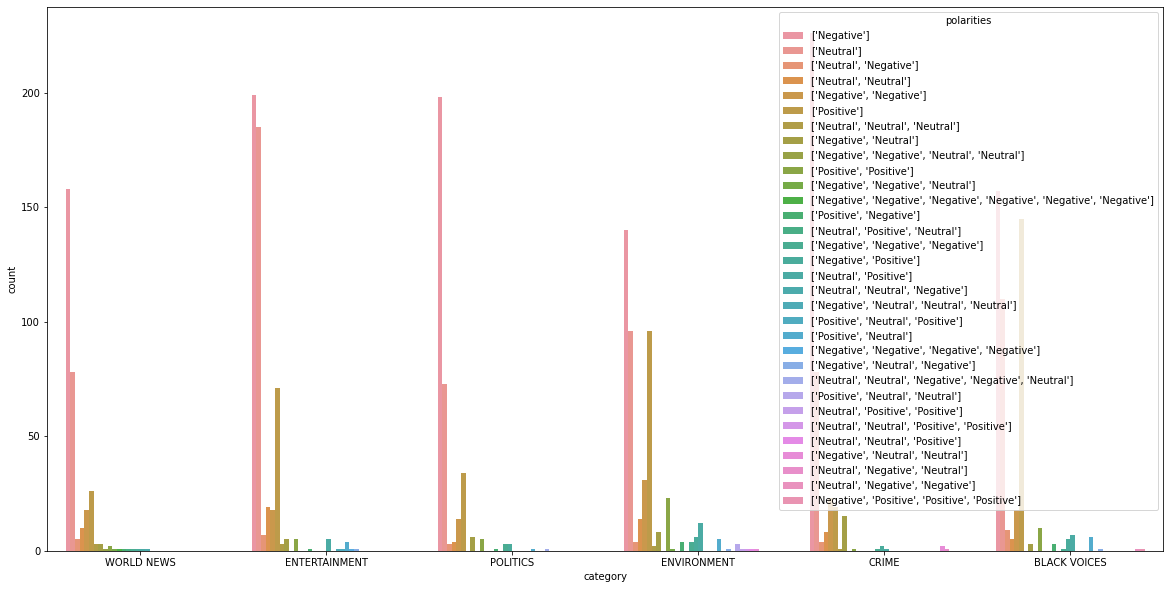

In [30]:
#make a plot by category to see the distribution of the data wrt polarities in that category 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(x='category', hue='polarities', data=df)
plt.show()

In [7]:
# df = df.explode('aspects')
# df = df.explode('polarities')

# # Create a new DataFrame with the exploded data
# new_df = pd.DataFrame({'aspects': df['aspects'], 'polarities': df['polarities']})
# new_df.head() 

# new_df.to_csv('new_df.csv', index=False)


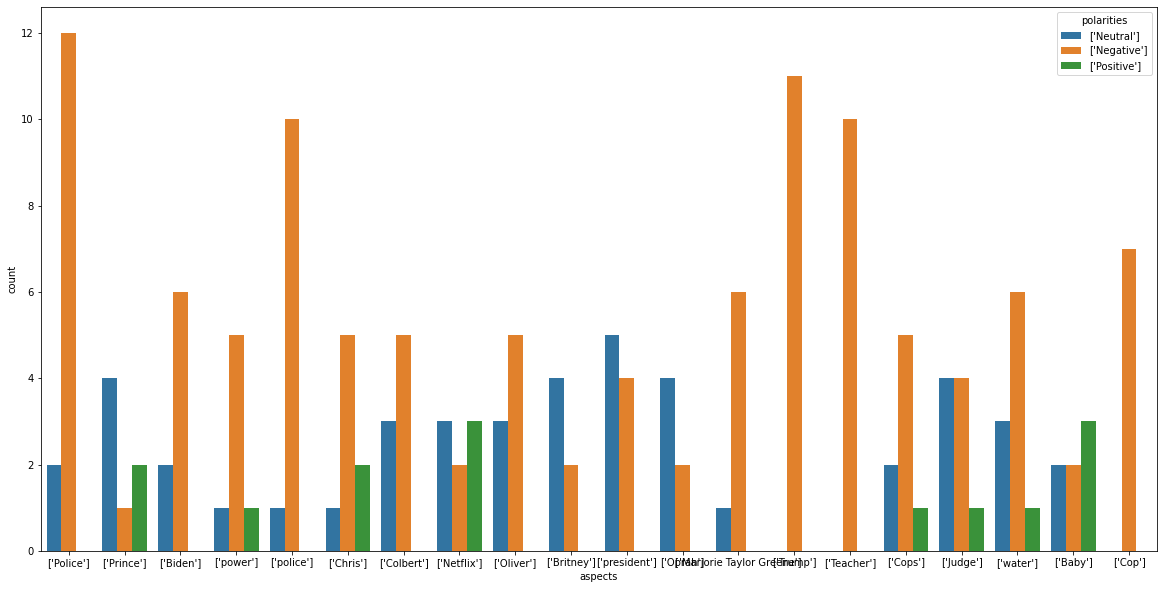

In [31]:
# Get the top 20 most common aspects
top_aspects = df['aspects'].value_counts().nlargest(20).index.tolist()

#make a plot by top 20 aspects to see the distribution of the data wrt polarities in that aspect in each category 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.countplot(x='aspects', hue='polarities', data=df[df['aspects'].isin(top_aspects)]) 
plt.show() 

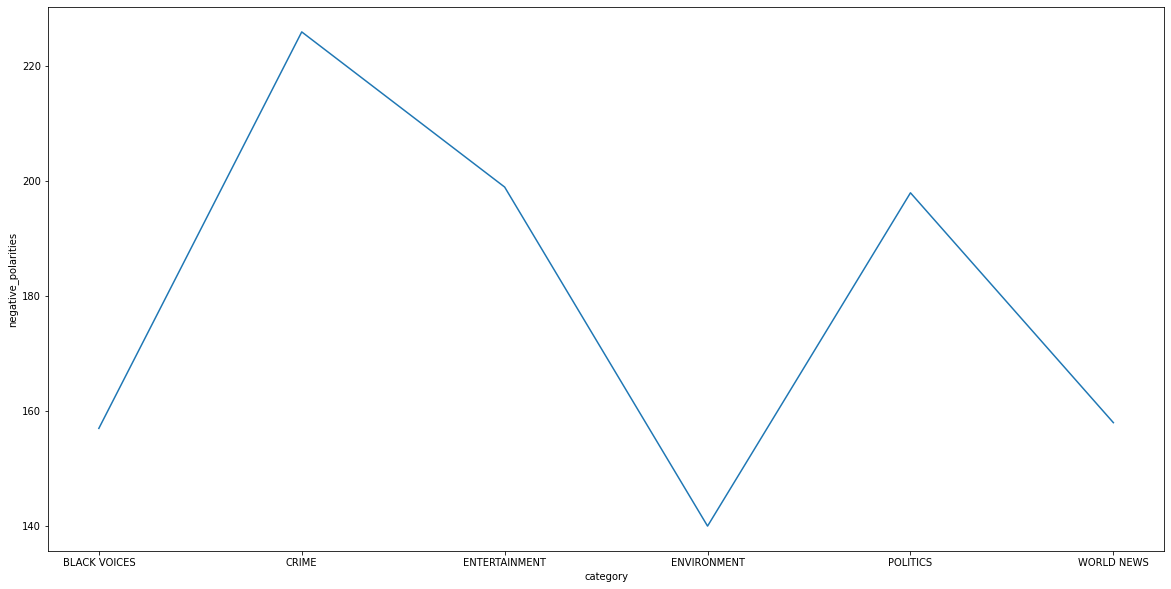

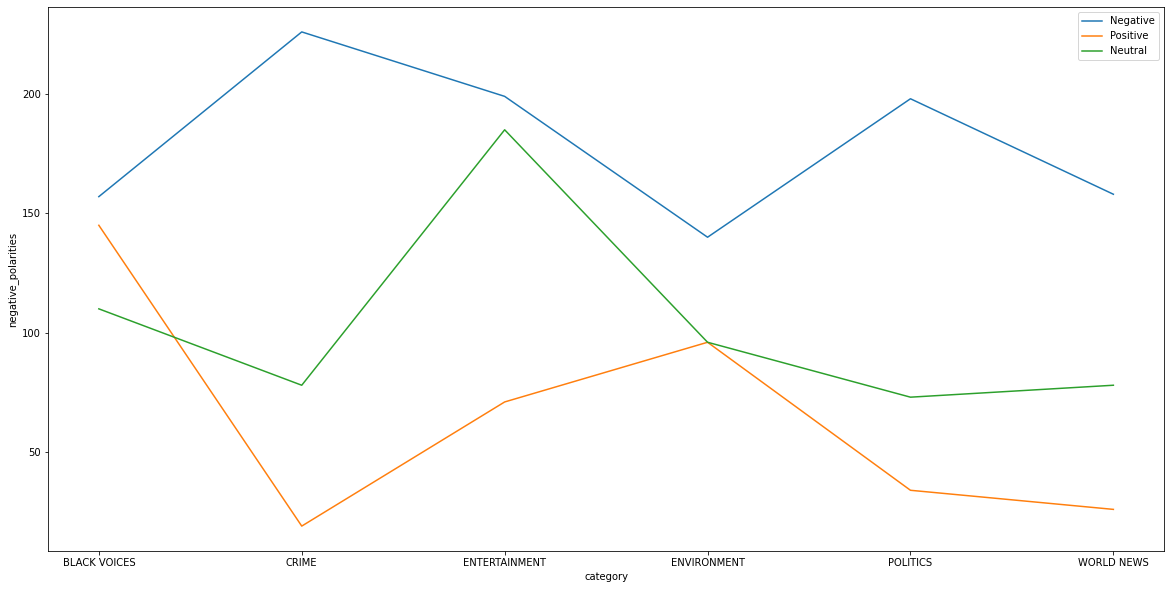

In [32]:
#make a line graph to see the distribution of the data wrt negative polarities in each category 
import matplotlib.pyplot as plt
import seaborn as sns

#get all the rows with negative polarities 
df_neg = df[df['polarities'] == "['Negative']"]  
df_pos = df[df['polarities'] == "['Positive']"]  
df_neu = df[df['polarities'] == "['Neutral']"]  

#group the data by category and count the number of negative polarities in each category
df_neg = df_neg.groupby('category').count()
df_neg = df_neg.reset_index()
df_neg = df_neg[['category', 'polarities']] 
df_neg = df_neg.rename(columns={'polarities': 'negative_polarities'})

#group the data by category and count the number of positive polarities in each category
df_pos = df_pos.groupby('category').count()
df_pos = df_pos.reset_index()
df_pos = df_pos[['category', 'polarities']]
df_pos = df_pos.rename(columns={'polarities': 'positive_polarities'})

#group the data by category and count the number of neutral polarities in each category
df_neu = df_neu.groupby('category').count()
df_neu = df_neu.reset_index()
df_neu = df_neu[['category', 'polarities']]
df_neu = df_neu.rename(columns={'polarities': 'neutral_polarities'})

#merge the dataframes
df_npn = pd.merge(df_neg, df_pos, on='category')
df_npn = pd.merge(df_npn, df_neu, on='category')

df_npn.head()

#make a line graph to see the distribution of the data wrt negative polarities in each category
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.lineplot(x='category', y='negative_polarities', data=df_npn)
plt.show()

#make a line graph to see the distribution of the data wrt positive, negative and neutral polarities in each category 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.lineplot(x='category', y='negative_polarities', data=df_npn, label='Negative')
sns.lineplot(x='category', y='positive_polarities', data=df_npn, label='Positive')
sns.lineplot(x='category', y='neutral_polarities', data=df_npn, label='Neutral')
plt.show()


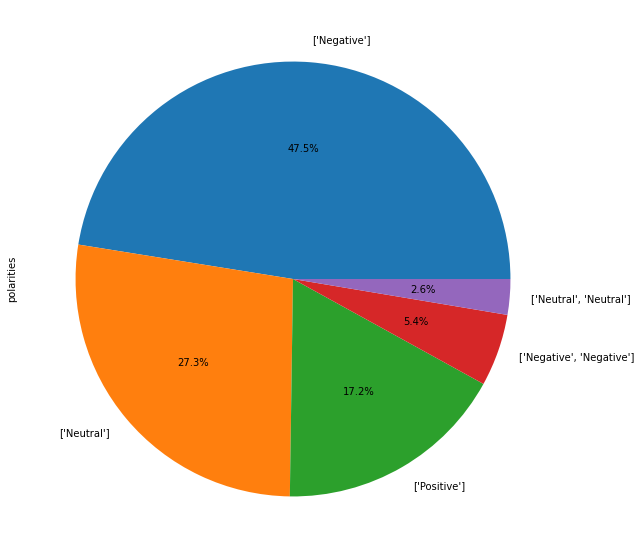

In [33]:
#plot a pie chart to see the distribution of the data wrt polarities 

import matplotlib.pyplot as plt
import seaborn as sns

# Set background color to white
plt.rcParams['figure.facecolor'] = 'white'

plt.figure(figsize=(20,10))
df['polarities'].value_counts().nlargest(5).plot.pie(autopct='%1.1f%%')
plt.show()



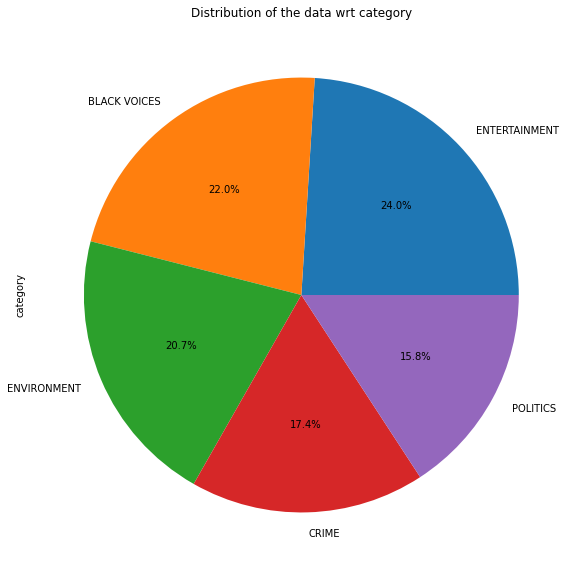

In [34]:
#plot a pie chart to see the distribution of the data wrt category
# Set background color to white
plt.rcParams['figure.facecolor'] = 'white'

fig, ax = plt.subplots(figsize=(20,10))
# ax.set_title('Distribution of the data wrt category', fontsize=20, pad=20)
df['category'].value_counts().nlargest(5).plot.pie(autopct='%1.1f%%', title='Distribution of the data wrt category')
plt.show()


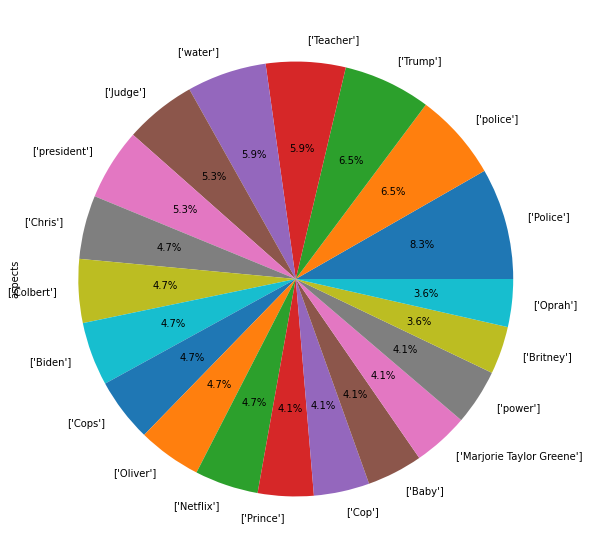

In [35]:
#plot a pie chart to see the distribution of the data wrt aspects
# Set background color to white
plt.rcParams['figure.facecolor'] = 'white'

plt.figure(figsize=(20,10))
df['aspects'].value_counts().nlargest(20).plot.pie(autopct='%1.1f%%', colors = None)
plt.show()

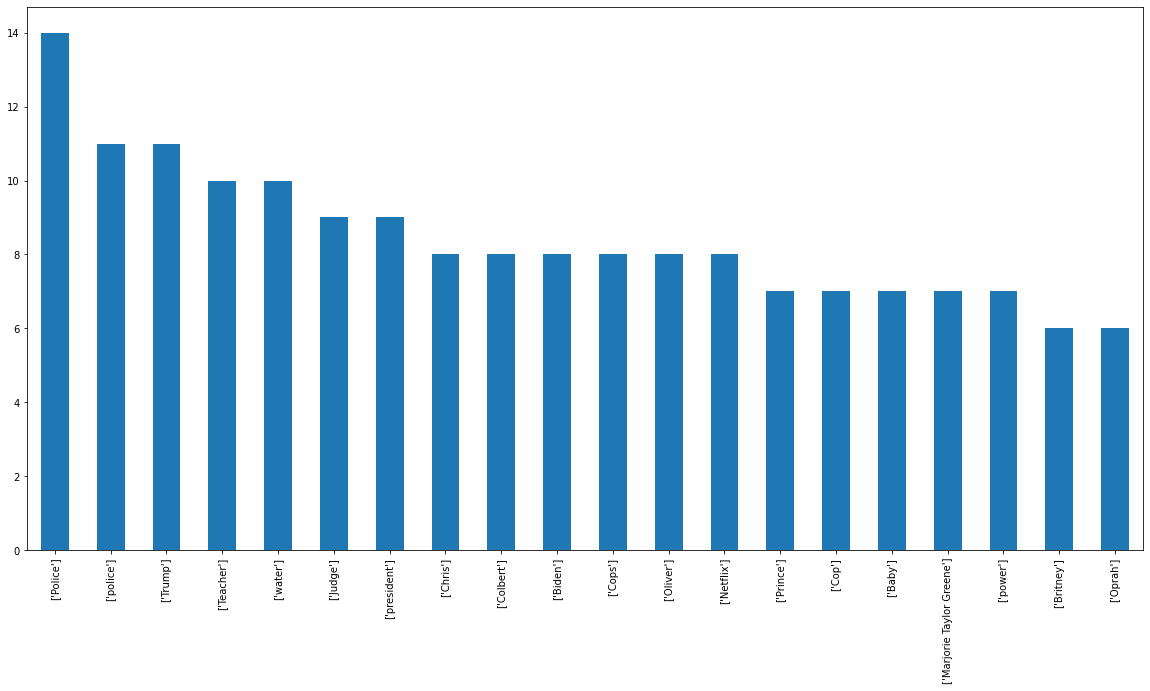

In [36]:
#get top 20 aspects with highest count
df['aspects'].value_counts().head(20)
#plot a bar chart to see the distribution of the data wrt aspects
plt.figure(figsize=(20,10))
df['aspects'].value_counts().head(20).plot.bar()
plt.show()

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1934471165.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1934471165.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspect

                       aspects positive negative neutral
0                   ['Police']        0       12       2
1                   ['police']        0       10       1
2                    ['Trump']        0       11       0
3                  ['Teacher']        0       10       0
4                    ['water']        1        6       3
5                    ['Judge']        1        4       4
6                ['president']        0        4       5
7                    ['Chris']        2        5       1
8                  ['Colbert']        0        5       3
9                    ['Biden']        0        6       2
10                    ['Cops']        1        5       2
11                  ['Oliver']        0        5       3
12                 ['Netflix']        3        2       3
13                  ['Prince']        2        1       4
14                     ['Cop']        0        7       0
15                    ['Baby']        3        2       2
16  ['Marjorie Taylor Greene'] 

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1934471165.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1934471165.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspect

<Figure size 2160x720 with 0 Axes>

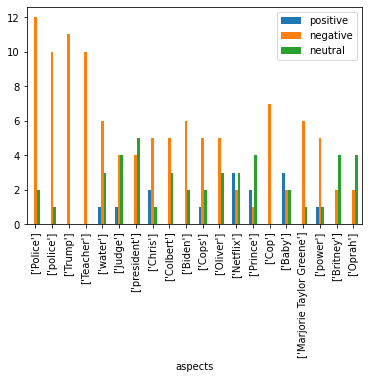

In [37]:
#for top 20 same aspects, get the count of positive, negative and neutral polarity and plot a bar chart 
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 20 most common aspects
top_aspects = df['aspects'].value_counts().nlargest(20).index.tolist()

# df['polarities'] == "['Negative']"
# Create a new DataFrame with the counts of polarities for each aspect in the top 20 
new_df = pd.DataFrame(columns=['aspects', 'positive', 'negative', 'neutral'])
for aspect in top_aspects:
    # print(f'"{aspect}"')
    new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)

print(new_df)
# Plot the bar chart

plt.figure(figsize=(30,10))
new_df.plot.bar(x='aspects')
plt.show()
# print(len(df[(df['aspects'] == "['trump']") & (df['polarities'] == "['Positive']")]) )


C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'

<Figure size 2160x720 with 0 Axes>

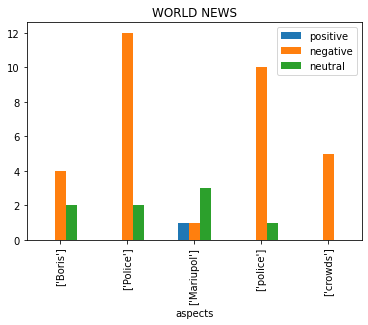

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'

<Figure size 2160x720 with 0 Axes>

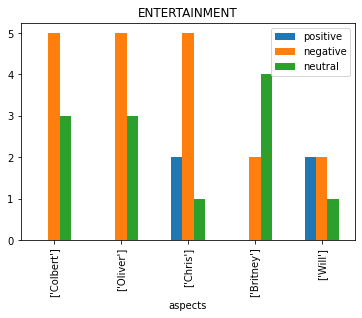

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'

<Figure size 2160x720 with 0 Axes>

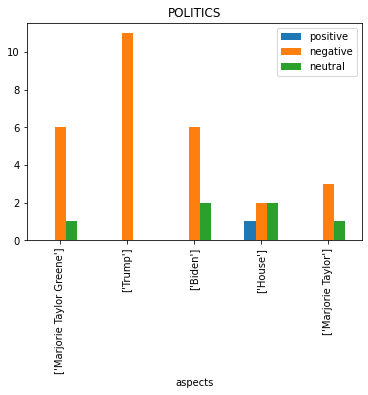

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'

<Figure size 2160x720 with 0 Axes>

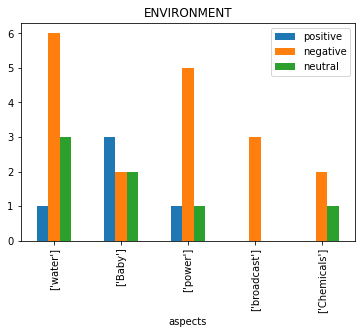

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'

<Figure size 2160x720 with 0 Axes>

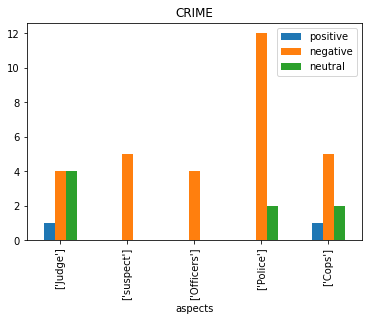

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'

<Figure size 2160x720 with 0 Axes>

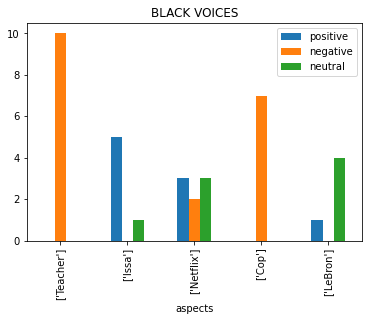

       aspects positive negative neutral
0  ['Teacher']        0       10       0
1     ['Issa']        5        0       1
2  ['Netflix']        3        2       3
3      ['Cop']        0        7       0
4   ['LeBron']        1        0       4


C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\1175045875.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspect

<Figure size 2160x720 with 0 Axes>

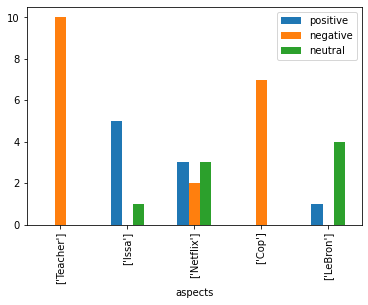

In [38]:

# Get the top 5 aspects for each category and plot a bar chart
for category in df['category'].unique():
    top_aspects = df[df['category'] == category]['aspects'].value_counts().nlargest(5).index.tolist()
    new_df = pd.DataFrame(columns=['aspects', 'positive', 'negative', 'neutral'])
    for aspect in top_aspects:
        new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)
    plt.figure(figsize=(30,10))
    new_df.plot.bar(x='aspects')
    plt.title(category)
    plt.show()

# df['polarities'] == "['Negative']"
# Create a new DataFrame with the counts of polarities for each aspect in the top 20 
new_df = pd.DataFrame(columns=['aspects', 'positive', 'negative', 'neutral'])
for aspect in top_aspects:
    # print(f'"{aspect}"')
    new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)

print(new_df)
# Plot the bar chart

plt.figure(figsize=(30,10))
new_df.plot.bar(x='aspects')
plt.show()
# print(len(df[(df['aspects'] == "['trump']") & (df['polarities'] == "['Positive']")]) )


In [39]:
#get the count of rows with aspects and polarities empty 


#get all the aspects in a list 
aspects = df['aspects'].tolist() 
polarities = df['polarities'].tolist() 

#get the count of each row with aspects equal to '[]' 
count = 0
for i in aspects:
    if i == "['ukraine']":
        count += 1
print(count)

#get the aspects column separately in a dataframe
df_A = df['aspects'] 
df_A.head()

#get the polarities column separately in a dataframe
df_P = df['polarities']
df_P.head()


#get aspects as "ukraine" and polarities as "positive" and "negative" in a dataframe
# df_A_P = df[(df['aspects'] == "['trump']") & (df['polarities'] == "['Negative']")] 
# df_A_P.head() 

0


0               ['Negative']
1               ['Negative']
2               ['Negative']
3                ['Neutral']
4    ['Neutral', 'Negative']
Name: polarities, dtype: object

In [40]:
aspects

["['service']",
 "['FIFA']",
 "['Ukrainian']",
 "['Queen Elizabeth II']",
 "['Queen', 'police']",
 "['workers']",
 "['Police']",
 "['Prince']",
 "['tampons', 'pads']",
 "['Salman']",
 "['Brittney', 'sentence']",
 "['Salman']",
 "['Whale']",
 "['smoke']",
 "['Boris']",
 "['patrons']",
 "['President', 'Prime']",
 "['bullfights']",
 "['Morale']",
 "['Fight']",
 "['Ferdinand Marcos']",
 "['Ferdinand']",
 "['Mariupol']",
 "['Dodgers']",
 "['Mariupol']",
 "['site']",
 "['food']",
 "['Mariupol']",
 "['Zelenskyy']",
 "['secretaries', 'state', 'defense']",
 "['secretary', 'state', 'defense']",
 "['Boris']",
 "['Police', 'compound']",
 "['Mariupol']",
 "['Food']",
 "['soldiers']",
 "['Putin']",
 "['Biden']",
 "['food', 'water']",
 "['exterior', 'black box recorder', 'flight data recorder', 'cockpit voice recorder']",
 "['head of state']",
 "['drops']",
 "['windows']",
 "['schools']",
 "['Professionals']",
 "['Part', 'components']",
 "['Price']",
 "['Wheat', 'breadbasket']",
 "['facilities', 'ser

In [41]:
#make a plot to see the variation of top 5 aspects with respect to time 
import matplotlib.pyplot as plt
import seaborn as sns

# Set background color to white
plt.rcParams['figure.facecolor'] = 'white'

# Get the top 5 most common aspects
top_aspects = df['aspects'].value_counts().nlargest(5).index.tolist()

# Create a new DataFrame with the counts of polarities for each aspect in the top 5
new_df = pd.DataFrame(columns=['aspects', 'positive', 'negative', 'neutral'])
for aspect in top_aspects:
    # print(f'"{aspect}"')
    new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)

#add dates column to the new dataframe 
new_df['date'] = df['date'] 
new_df.head()

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\3069509484.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Neutral']")])}, ignore_index=True)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_33848\3069509484.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'aspects': aspect, 'positive': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Positive']")]), 'negative': len(df[(df['aspects'] == aspect) & (df['polarities'] == "['Negative']")]), 'neutral': len(df[(df['aspect

,aspects,positive,negative,neutral,date
0,['Police'],0,12,2,9/22/22
1,['police'],0,10,1,9/21/22
2,['Trump'],0,11,0,9/20/22
3,['Teacher'],0,10,0,9/18/22
4,['water'],1,6,3,9/17/22
